https://docs.python.org/3/library/sqlite3.html

In [1]:
import sqlite3

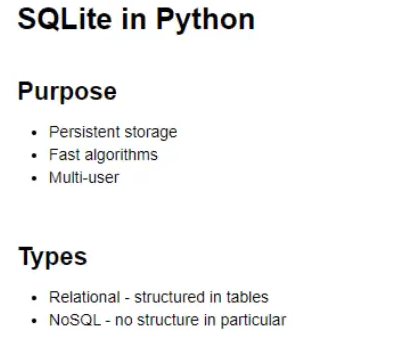
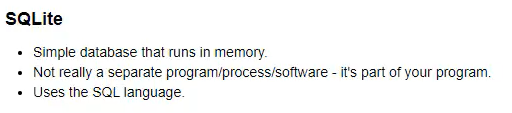
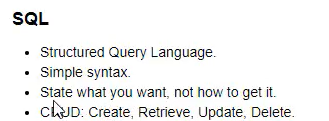
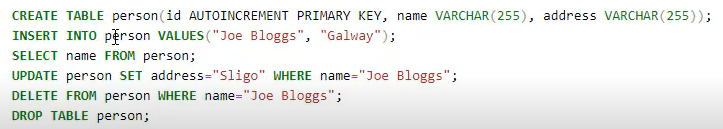

# Pandas Comparison

In [2]:
import pandas as pd

In [3]:
person = pd.read_csv("https://raw.githubusercontent.com/brianmcgatu/sqlite/main/person.csv")
person

,ID,Name,Address
0,1,Kathleen Mayer,Westmeath
1,2,Ashley Adams,Leitrim
2,3,Brenda Snyder,Dublin
3,4,Brenda Morrison,Kildare
4,5,Linda Ross,Waterford
...,...,...,...
95,96,Jason Ferguson,Laois
96,97,Daniel Michael,Laois
97,98,Emma Rivera,Westmeath
98,99,Katrina Martin,Clare


In [4]:
person = pd.read_csv("https://raw.githubusercontent.com/brianmcgatu/sqlite/main/person.csv", index_col=0)
person.tail(10)

,Name,Address
ID,,
91,Jason Frazier,Meath
92,Gina Meyer,Roscommon
93,Roy Brown,Leitrim
94,Andrew Foster,Tipperary
95,Kelly Stout,Carlow
96,Jason Ferguson,Laois
97,Daniel Michael,Laois
98,Emma Rivera,Westmeath
99,Katrina Martin,Clare


In [5]:
car = pd.read_csv("https://raw.githubusercontent.com/brianmcgatu/sqlite/main/car.csv", index_col=0)
car.head(10)

,RegCounty,Registration,ID_Owner
ID,,,
1,MH,18-MH-43626,80
2,MH,17-MH-32032,65
3,LS,15-LS-38287,95
4,L,17-L-14481,23
5,KK,15-KK-43823,79
6,DL,18-DL-45373,17
7,LH,18-LH-16127,99
8,KE,16-KE-16566,67
9,CN,13-CN-48257,98


In [6]:
county = pd.read_csv("https://raw.githubusercontent.com/brianmcgatu/sqlite/main/county.csv", index_col=0)
county.head(10)

,RegistrationCode,CountyName
ID,,
1,C,Cork
2,CE,Clare
3,CN,Cavan
4,CW,Carlow
5,D,Dublin
6,DL,Donegal
7,G,Galway
8,KE,Kildare
9,KK,Kilkenny


In [7]:
pd.merge(car, person, left_on="ID_Owner", right_on="ID")

,RegCounty,Registration,ID_Owner,Name,Address
0,MH,18-MH-43626,80,Michael Arias Jr.,Leitrim
1,CW,18-CW-48283,80,Michael Arias Jr.,Leitrim
2,C,21-C-10247,80,Michael Arias Jr.,Leitrim
3,SO,21-SO-10623,80,Michael Arias Jr.,Leitrim
4,KE,13-KE-49240,80,Michael Arias Jr.,Leitrim
...,...,...,...,...,...
275,L,10-L-28112,24,Brent Gray,Longford
276,MN,13-MN-27235,25,Daniel Taylor,Offaly
277,WH,23-WH-20809,25,Daniel Taylor,Offaly
278,WW,12-WW-29799,30,Laura Cole,Clare


In [8]:
pd.merge(car, person, left_on="ID_Owner", right_on="ID", how="left")

,RegCounty,Registration,ID_Owner,Name,Address
0,MH,18-MH-43626,80,Michael Arias Jr.,Leitrim
1,MH,17-MH-32032,65,Jessica White,Meath
2,LS,15-LS-38287,95,Kelly Stout,Carlow
3,L,17-L-14481,23,Heidi Smith,Clare
4,KK,15-KK-43823,79,Shannon Rich,Louth
...,...,...,...,...,...
275,RN,13-RN-48458,79,Shannon Rich,Louth
276,CN,11-CN-21207,55,Rickey Hanson,Wexford
277,T,10-T-48323,59,Shannon Horne,Louth
278,MN,15-MN-25206,67,David Burch,Dublin


In [9]:
tmp = pd.merge(car, person, left_on="ID_Owner", right_on="ID", how="left")
tmp.head(10)

,RegCounty,Registration,ID_Owner,Name,Address
0,MH,18-MH-43626,80,Michael Arias Jr.,Leitrim
1,MH,17-MH-32032,65,Jessica White,Meath
2,LS,15-LS-38287,95,Kelly Stout,Carlow
3,L,17-L-14481,23,Heidi Smith,Clare
4,KK,15-KK-43823,79,Shannon Rich,Louth
5,DL,18-DL-45373,17,Eric Hobbs,Mayo
6,LH,18-LH-16127,99,Katrina Martin,Clare
7,KE,16-KE-16566,67,David Burch,Dublin
8,CN,13-CN-48257,98,Emma Rivera,Westmeath
9,W,15-W-23985,78,Jacqueline Butler,Louth


In [10]:
tmp = pd.merge(tmp, county, left_on="Address", right_on="CountyName", how="left")
tmp.head(10)

,RegCounty,Registration,ID_Owner,Name,Address,RegistrationCode,CountyName
0,MH,18-MH-43626,80,Michael Arias Jr.,Leitrim,LM,Leitrim
1,MH,17-MH-32032,65,Jessica White,Meath,MH,Meath
2,LS,15-LS-38287,95,Kelly Stout,Carlow,CW,Carlow
3,L,17-L-14481,23,Heidi Smith,Clare,CE,Clare
4,KK,15-KK-43823,79,Shannon Rich,Louth,LH,Louth
5,DL,18-DL-45373,17,Eric Hobbs,Mayo,MO,Mayo
6,LH,18-LH-16127,99,Katrina Martin,Clare,CE,Clare
7,KE,16-KE-16566,67,David Burch,Dublin,D,Dublin
8,CN,13-CN-48257,98,Emma Rivera,Westmeath,WH,Westmeath
9,W,15-W-23985,78,Jacqueline Butler,Louth,LH,Louth


In [11]:
tmp = tmp[tmp['RegCounty'] == tmp['RegistrationCode']]
tmp.head(10)

,RegCounty,Registration,ID_Owner,Name,Address,RegistrationCode,CountyName
1,MH,17-MH-32032,65,Jessica White,Meath,MH,Meath
43,MN,14-MN-33134,72,Jill Johnson,Monaghan,MN,Monaghan
58,MN,15-MN-23767,29,Levi Henry,Monaghan,MN,Monaghan
64,WH,10-WH-45260,86,Susan Campbell,Westmeath,WH,Westmeath
115,MO,13-MO-23278,69,Connie Howard,Mayo,MO,Mayo
149,CW,22-CW-41399,42,Kelsey Mullins,Carlow,CW,Carlow
172,MN,18-MN-22373,76,Amanda Wise,Monaghan,MN,Monaghan
262,W,15-W-12973,46,Matthew Bennett,Waterford,W,Waterford


In [12]:
tmp = tmp[tmp['RegCounty'] != tmp['RegistrationCode']]
tmp

,RegCounty,Registration,ID_Owner,Name,Address,RegistrationCode,CountyName


# SQLite3: Create Database

In [13]:
import sqlite3

In [14]:
con = sqlite3.connect("data/tutorial.db")    # C:\Users\Niall\2.1ProgramminForDataAnalysis\ProgDataAnalysis\SQLite

In [15]:
cur = con.cursor()    # create cursor

In [16]:
cur.execute("CREATE TABLE person(name text, address text)")
con.commit()

OperationalError: table person already exists

In [17]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
cur.fetchall()

[('person',)]

# Inserting Data

### Adding person to the data base

In [18]:
cur.execute("INSERT INTO person VALUES ('Kathleen Mayer','Westmeath') ")
con.commit()

In [20]:
cur.execute("SELECT * FROM person")
cur.fetchall()

[('Kathleen Mayer', 'Westmeath'), ('Kathleen Mayer', 'Westmeath')]

In [21]:
# To delete previos entry copy and paste previous con.commit() to delete command
cur.execute("DELETE FROM person")
con.commit()

In [23]:
# Returning a blank database
cur.execute("SELECT * FROM person")
cur.fetchall()

[]

In [24]:
cur.execute("INSERT INTO person VALUES ('Kathleen Mayer','Westmeath') ")
con.commit()

### Delete all

In [25]:
cur.execute("SELECT * FROM person")
cur.fetchall()

[('Kathleen Mayer', 'Westmeath')]

In [27]:
people = [
    ("Ashley Adams","Leitrim"),
    ("Brenda Snyder","Dublin"),
    ("Brenda Morrison","Kildare"),
]
cur.executemany("INSERT INTO person VALUES(?,?)",people)

In [28]:
cur.execute("SELECT * FROM person")
cur.fetchall()

[('Kathleen Mayer', 'Westmeath'),
 ('Ashley Adams', 'Leitrim'),
 ('Brenda Snyder', 'Dublin'),
 ('Brenda Morrison', 'Kildare')]

In [31]:
# Much handier for adding data  V
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html

In [32]:
cur.execute("SELECT ROWID, name, address FROM person")
cur.fetchall()

[(1, 'Kathleen Mayer', 'Westmeath'),
 (2, 'Ashley Adams', 'Leitrim'),
 (3, 'Brenda Snyder', 'Dublin'),
 (4, 'Brenda Morrison', 'Kildare')]

### Delete item & Primary Keys

In [33]:
cur.execute("DELETE FROM person WHERE ROWID=1")
con.commit()

In [34]:
cur.execute("SELECT ROWID, name, address FROM person")
cur.fetchall()

[(2, 'Ashley Adams', 'Leitrim'),
 (3, 'Brenda Snyder', 'Dublin'),
 (4, 'Brenda Morrison', 'Kildare')]

In [35]:
cur.execute("INSERT INTO person VALUES ('Kathleen Mayer','Westmeath') ")
con.commit()

In [36]:
cur.execute("SELECT ROWID, name, address FROM person")
cur.fetchall()

[(2, 'Ashley Adams', 'Leitrim'),
 (3, 'Brenda Snyder', 'Dublin'),
 (4, 'Brenda Morrison', 'Kildare'),
 (5, 'Kathleen Mayer', 'Westmeath')]

In [37]:
cur.execute("INSERT INTO person VALUES ('Kathleen Mayer','Westmeath') ")
con.commit()

In [38]:
cur.execute("SELECT ROWID, name, address FROM person")
cur.fetchall()

[(2, 'Ashley Adams', 'Leitrim'),
 (3, 'Brenda Snyder', 'Dublin'),
 (4, 'Brenda Morrison', 'Kildare'),
 (5, 'Kathleen Mayer', 'Westmeath'),
 (6, 'Kathleen Mayer', 'Westmeath')]

In [39]:
# Above have primary keys in ROWID which distinguishes each one

# SQLite3 with Pandas 

In [41]:
# Returning the person table from db
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
cur.fetchall()

[('person',)]

### Drop

In [42]:
# Delete table
cur.execute("DROP TABLE person")      # health warning with this command
con.commit()

In [43]:
# Return blank db
cur.execute("SELECT name FROM sqlite_master WHERE type='table'")
cur.fetchall()

[]

### Pandas df to SQL

In [44]:
person.to_sql("person", con)

100

In [47]:
cur.execute("SELECT * FROM person")
cur.fetchall()

[(1, 'Kathleen Mayer', 'Westmeath'),
 (2, 'Ashley Adams', 'Leitrim'),
 (3, 'Brenda Snyder', 'Dublin'),
 (4, 'Brenda Morrison', 'Kildare'),
 (5, 'Linda Ross', 'Waterford'),
 (6, 'Elizabeth Russell', 'Waterford'),
 (7, 'Haley Obrien', 'Galway'),
 (8, 'Stephanie Burton', 'Tipperary'),
 (9, 'Mark Manning', 'Louth'),
 (10, 'Andrew Mendez', 'Sligo'),
 (11, 'Kristin Barry', 'Meath'),
 (12, 'Jeremy Ware', 'Laois'),
 (13, 'Joshua Lopez', 'Wicklow'),
 (14, 'Mrs. Cindy Powell', 'Cork'),
 (15, 'Cindy Pineda', 'Clare'),
 (16, 'James Santos', 'Cork'),
 (17, 'Eric Hobbs', 'Mayo'),
 (18, 'Jennifer Garcia', 'Kilkenny'),
 (19, 'Susan Perkins', 'Roscommon'),
 (20, 'Michael Smith', 'Cavan'),
 (21, 'Lauren Rodriguez', 'Mayo'),
 (22, 'Daniel Dean', 'Leitrim'),
 (23, 'Heidi Smith', 'Clare'),
 (24, 'Brent Gray', 'Longford'),
 (25, 'Daniel Taylor', 'Offaly'),
 (26, 'David Moore', 'Kerry'),
 (27, 'Andrea Fox', 'Laois'),
 (28, 'Hayley Lewis', 'Roscommon'),
 (29, 'Levi Henry', 'Monaghan'),
 (30, 'Laura Cole', 'Cl

In [57]:
car.to_sql("car", con)

280

In [58]:
cur.execute("SELECT * FROM car")
cur.fetchall()

[(1, 'MH', '18-MH-43626', 80),
 (2, 'MH', '17-MH-32032', 65),
 (3, 'LS', '15-LS-38287', 95),
 (4, 'L', '17-L-14481', 23),
 (5, 'KK', '15-KK-43823', 79),
 (6, 'DL', '18-DL-45373', 17),
 (7, 'LH', '18-LH-16127', 99),
 (8, 'KE', '16-KE-16566', 67),
 (9, 'CN', '13-CN-48257', 98),
 (10, 'W', '15-W-23985', 78),
 (11, 'WW', '15-WW-36677', 45),
 (12, 'OY', '12-OY-44873', 7),
 (13, 'T', '16-T-39909', 44),
 (14, 'KK', '13-KK-45866', 63),
 (15, 'G', '21-G-27162', 74),
 (16, 'D', '17-D-45148', 51),
 (17, 'SO', '12-SO-35882', 62),
 (18, 'CW', '21-CW-37957', 98),
 (19, 'MH', '16-MH-30592', 23),
 (20, 'MH', '16-MH-23285', 27),
 (21, 'MH', '14-MH-46240', 1),
 (22, 'KK', '12-KK-29974', 15),
 (23, 'DL', '12-DL-19444', 84),
 (24, 'OY', '12-OY-30252', 13),
 (25, 'KE', '17-KE-43950', 11),
 (26, 'RN', '19-RN-27470', 100),
 (27, 'LM', '13-LM-39344', 73),
 (28, 'SO', '15-SO-29286', 40),
 (29, 'OY', '11-OY-21919', 7),
 (30, 'SO', '18-SO-14647', 1),
 (31, 'RN', '16-RN-10486', 53),
 (32, 'KK', '12-KK-24377', 86)

In [52]:
county.to_sql("county", con)

26

In [53]:
cur.execute("SELECT * FROM county")
cur.fetchall()

[(1, 'C', 'Cork'),
 (2, 'CE', 'Clare'),
 (3, 'CN', 'Cavan'),
 (4, 'CW', 'Carlow'),
 (5, 'D', 'Dublin'),
 (6, 'DL', 'Donegal'),
 (7, 'G', 'Galway'),
 (8, 'KE', 'Kildare'),
 (9, 'KK', 'Kilkenny'),
 (10, 'KY', 'Kerry'),
 (11, 'L', 'Limerick'),
 (12, 'LD', 'Longford'),
 (13, 'LH', 'Louth'),
 (14, 'LM', 'Leitrim'),
 (15, 'LS', 'Laois'),
 (16, 'MH', 'Meath'),
 (17, 'MN', 'Monaghan'),
 (18, 'MO', 'Mayo'),
 (19, 'OY', 'Offaly'),
 (20, 'RN', 'Roscommon'),
 (21, 'SO', 'Sligo'),
 (22, 'T', 'Tipperary'),
 (23, 'W', 'Waterford'),
 (24, 'WH', 'Westmeath'),
 (25, 'WX', 'Wexford'),
 (26, 'WW', 'Wicklow')]